In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **About Dataset**

- Absolute Temperature (°K)
- Relative Luminosity (L/Lo)
- Relative Radius (R/Ro)
- Absolute Magnitude (Mv)
- Star Type (Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiants, HyperGiants)
- Star Color (Red, Blue White, White, Yellowish White, Pale yellow orange, Blue, Whitish, yellow-white, Orange, White-Yellow, white, etc)
- Spectral Class

Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)

Ro = 6.9551 x 10^8 m (Avg Radius of Sun)

### Purpose:

The purpose of making the dataset is to prove that the stars follows a certain graph in the celestial Space ,
specifically called Hertzsprung-Russell Diagram so that we can classify stars by plotting its features based on that graph.

### Data Collection and Preparation techniques:

The dataset is created based on several equations in astrophysics. They are given below:

1. Stefan-Boltzmann's law of Black body radiation (To find the luminosity of a star) $$L = 4\pi R^2 \sigma T^4$$
2. Wien's Displacement law (for finding surface temperature of a star using wavelength) $$\lambda_{max} = \frac{b}{T} $$
3. Absolute magnitude relation $$m_V-M_V = 5\log(\frac{d}{10})$$
4. Radius of a star using parallax. $$\frac{r}{1AU}=\frac{D_{\theta}}{2\omega}$$


## **Knowing the stars dataset**

In [89]:
stars_df = pd.read_csv('./Star_dataset.csv')

In [90]:
stars_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [91]:
rows_stars = len(stars_df.axes[0])
columns_stars = len(stars_df.axes[1])
print(f'Columns: {columns_stars}')
print(f'Rows: {rows_stars}')


Columns: 7
Rows: 240


We

In [92]:
stars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [93]:
stars_df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [94]:
stars_df.isnull().sum()

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64

In [95]:
stars_df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [96]:
stars_df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'Blue ',
       'yellowish', 'Yellowish', 'Orange-Red', 'Blue white ',
       'Blue-White'], dtype=object)

In [97]:
stars_df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

## **Dataset preparation**

- Brown Dwarf -> Star Type = 0

- Red Dwarf -> Star Type = 1

- White Dwarf-> Star Type = 2

- Main Sequence -> Star Type = 3

- Supergiant -> Star Type = 4

- Hypergiant -> Star Type = 5 


In [98]:
def assignment_star_type(num_type):
    match num_type:
        case 0:
            return 'Brown Dwarf'
        case 1:
            return 'Red Dwarf'
        case 2:
            return 'White Dwarf'
        case 3:
            return 'Main Sequence'
        case 4:
            return 'Supergiant'
        case 5:
            return 'Hypergiant'

In [99]:
stars_df['Star type'] = stars_df['Star type'].apply(assignment_star_type)
stars_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M


In [100]:
def whitespeces_remover(data_frame):
    for col in data_frame.columns:
        if data_frame[col].dtype == 'object':
            data_frame[col] = data_frame[col].apply(str.strip)
            data_frame[col] = data_frame[col].apply(lambda x: x.replace('-', ' '))
            data_frame[col] = data_frame[col].apply(lambda x: x.lower())
            data_frame[col] = data_frame[col].apply(lambda x: x.title())
        else:
            pass

In [101]:
whitespeces_remover(stars_df)
stars_df.head(5)
stars_df['Star color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White',
       'Pale Yellow Orange', 'Blue', 'Whitish', 'Yellow White', 'Orange',
       'White Yellow', 'Yellowish', 'Orange Red'], dtype=object)

In [111]:
stars_df = stars_df.sort_values('Temperature (K)',ascending=True)
greater_than_10k = stars_df['Temperature (K)'] > 10000
less_than_25k = stars_df['Temperature (K)'] < 25000
stars_df[greater_than_10k & less_than_25k]

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
211,10012,552.00000,5.8560,0.013,Main Sequence,Blue White,A
81,10574,0.00014,0.0092,12.020,White Dwarf,White,F
227,10930,783930.00000,25.0000,-6.224,Supergiant,Blue,O
87,10980,0.00074,0.0087,11.190,White Dwarf,Blue White,B
177,11000,170000.00000,1779.0000,-9.900,Hypergiant,Blue White,B
...,...,...,...,...,...,...,...
206,24020,0.00159,0.0127,10.550,White Dwarf,Blue,B
230,24145,382993.00000,1494.0000,-8.840,Hypergiant,Blue White,B
108,24345,142000.00000,57.0000,-6.240,Supergiant,Blue,O
179,24490,248490.00000,1134.5000,-8.240,Hypergiant,Blue White,B


### **Wavelength using temperature and Wien's law**

In [116]:
b = 2.8977e-3
stars_df['Wavelength (nm)'] = b*1e9/stars_df['Temperature (K)']
stars_df.tail(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Wavelength (nm)
239,37882,294903.0,1783.0,-7.80,Hypergiant,Blue,O,76.492793
231,38234,272830.0,1356.0,-9.29,Hypergiant,Blue,O,75.788565
235,38940,374830.0,1356.0,-9.93,Hypergiant,Blue,O,74.414484
30,39000,204000.0,10.6,-4.70,Main Sequence,Blue,O,74.300000
101,40000,813000.0,14.0,-6.23,Supergiant,Blue,O,72.442500


## **Visualization**

In [136]:
sns.set(style='darkgrid', palette='flare', font='', font_scale=1)

<function matplotlib.pyplot.show(close=None, block=None)>

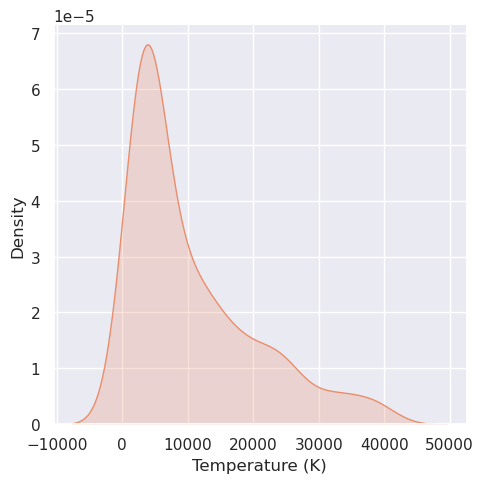

In [144]:
sns.displot(data=stars_df, x='Temperature (K)', kind='kde', fill=True, bw_adjust=1, legend=True)
plt.show

/tmp/ipykernel_36407/95953673.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=stars_df, x='Temperature (K)', hue='Spectral Class',kind='kde', fill=True, bw_adjust=1, legend=True)


<function matplotlib.pyplot.show(close=None, block=None)>

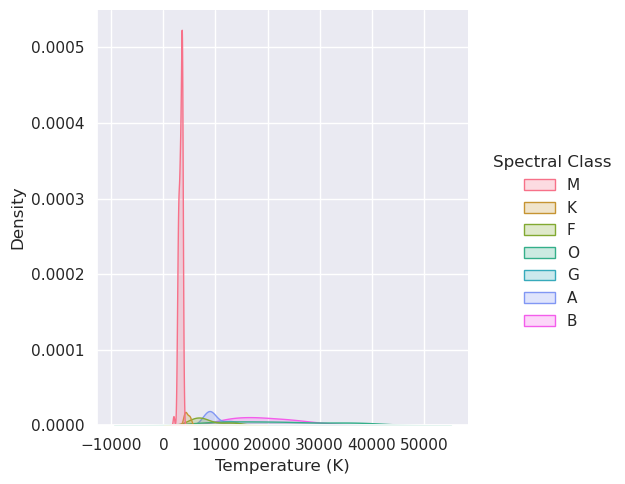

In [143]:
sns.displot(data=stars_df, x='Temperature (K)', hue='Spectral Class',kind='kde', fill=True, bw_adjust=1, legend=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

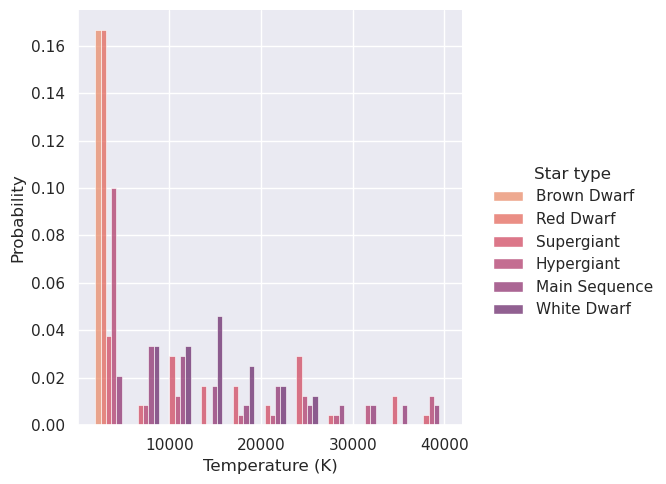

In [157]:
sns.displot(data=stars_df, x='Temperature (K)', hue='Star type',kind='hist', fill=True, legend=True, stat='probability', multiple='dodge')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

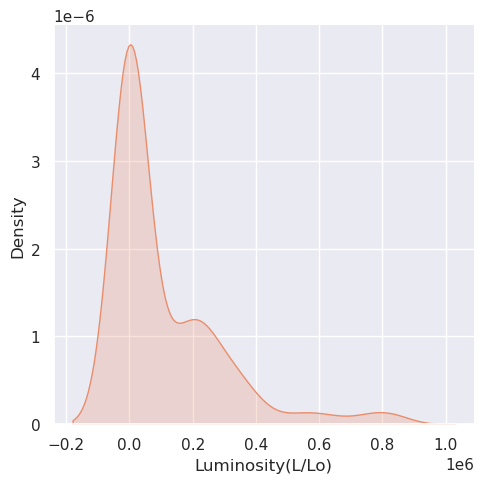

In [146]:
sns.displot(data=stars_df, x='Luminosity(L/Lo)', kind='kde', fill=True, bw_adjust=1, legend=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

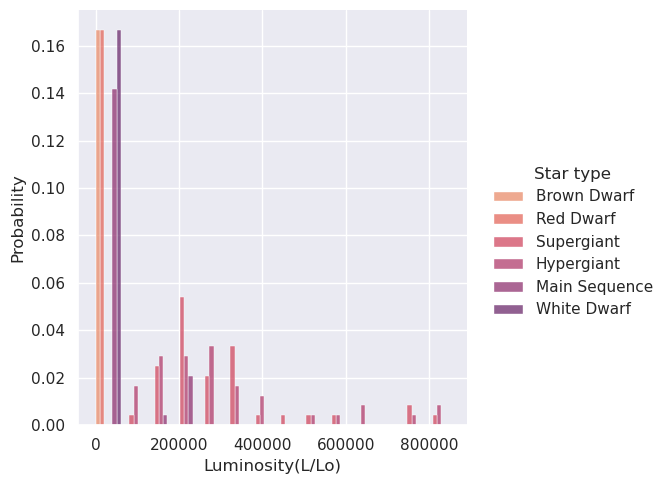

In [158]:
sns.displot(data=stars_df, x='Luminosity(L/Lo)', hue='Star type',kind='hist', fill=True, legend=True, stat='probability', multiple='dodge')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

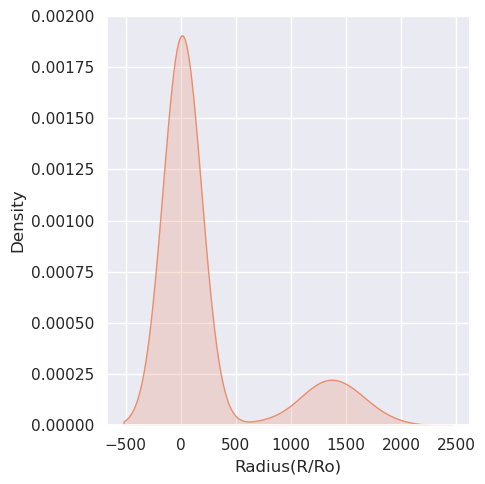

In [147]:
sns.displot(data=stars_df, x='Radius(R/Ro)', kind='kde', fill=True, bw_adjust=1, legend=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

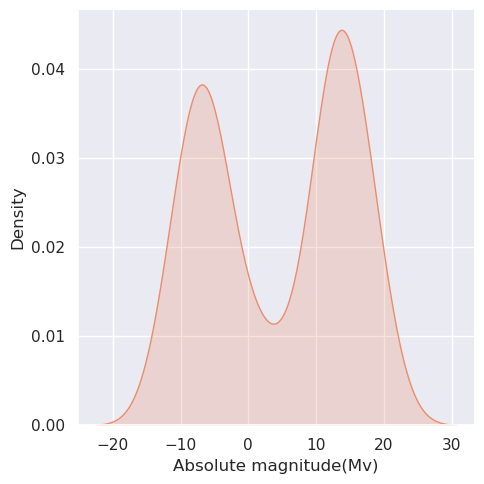

In [149]:
sns.displot(data=stars_df, x='Absolute magnitude(Mv)', kind='kde', fill=True, bw_adjust=1, legend=True)
plt.show

/tmp/ipykernel_36407/3975055839.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=stars_df, x='Absolute magnitude(Mv)', kind='kde', hue='Spectral Class', fill=True, bw_adjust=1, legend=True)


<function matplotlib.pyplot.show(close=None, block=None)>

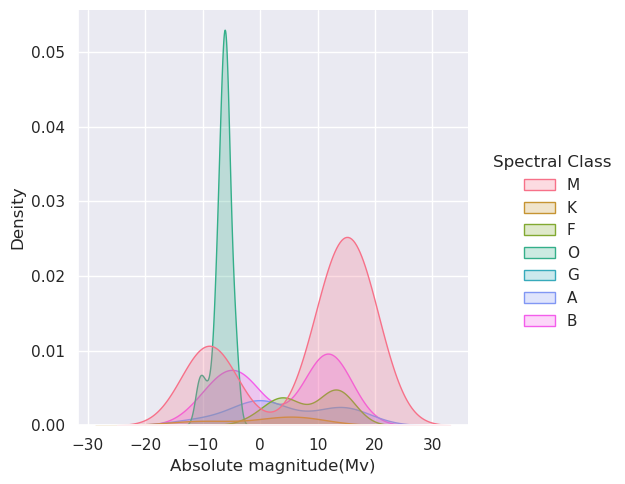

In [153]:
sns.displot(data=stars_df, x='Absolute magnitude(Mv)', kind='kde', hue='Spectral Class', fill=True, bw_adjust=1, legend=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

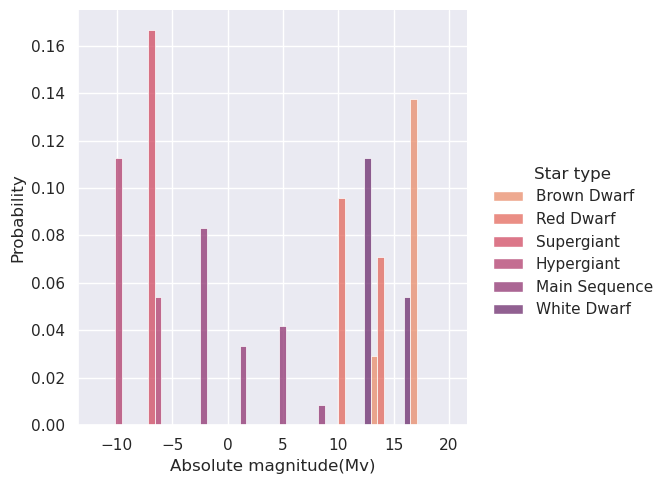

In [160]:
sns.displot(data=stars_df, x='Absolute magnitude(Mv)', hue='Star type',kind='hist', fill=True, legend=True, stat='probability', multiple='dodge')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

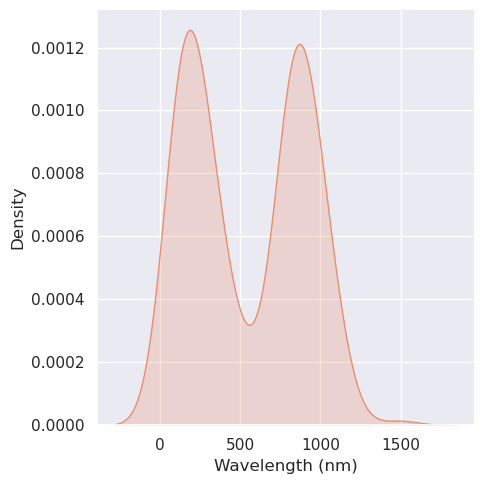

In [138]:
sns.displot(data=stars_df, x='Wavelength (nm)', kind='kde', fill=True)
plt.show

/tmp/ipykernel_36407/343932039.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=stars_df, x='Wavelength (nm)', hue='Spectral Class', kind='kde', fill=True)


<function matplotlib.pyplot.show(close=None, block=None)>

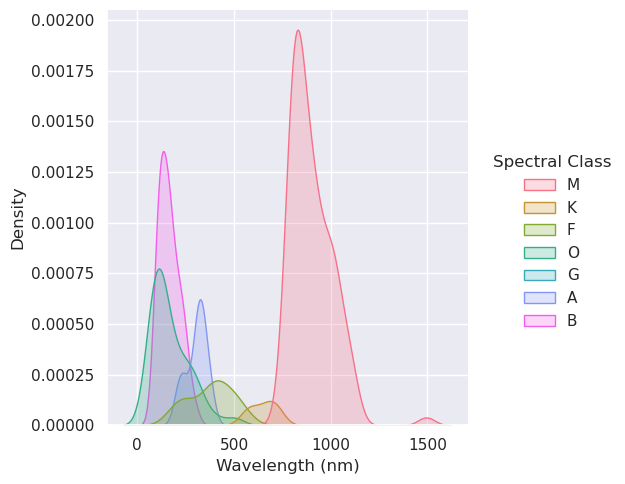

In [145]:
sns.displot(data=stars_df, x='Wavelength (nm)', hue='Spectral Class', kind='kde', fill=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

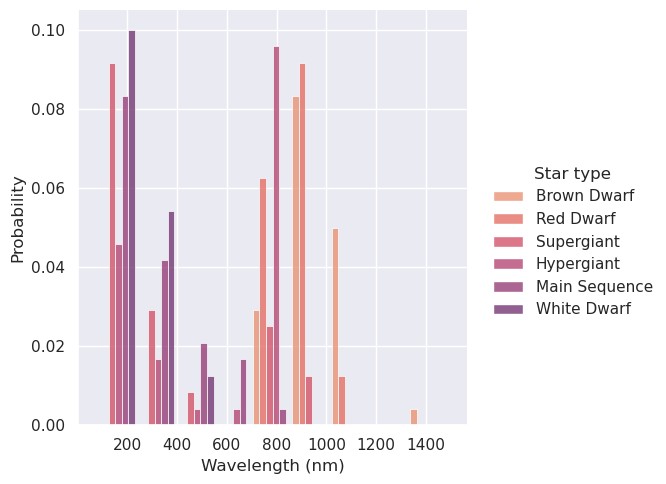

In [161]:
sns.displot(data=stars_df, x='Wavelength (nm)', hue='Star type',kind='hist', fill=True, legend=True, stat='probability', multiple='dodge')
plt.show

### Categorical

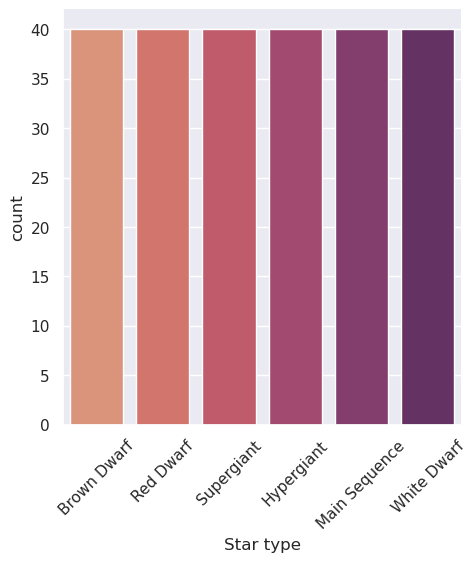

In [165]:
sns.catplot(data=stars_df, x='Star type', kind='count')
plt.xticks(rotation= 45)
plt.show()

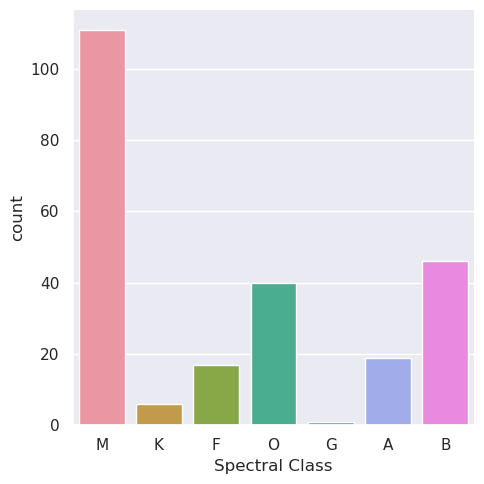

In [167]:
sns.catplot(data=stars_df, x='Spectral Class', kind='count')
plt.show()

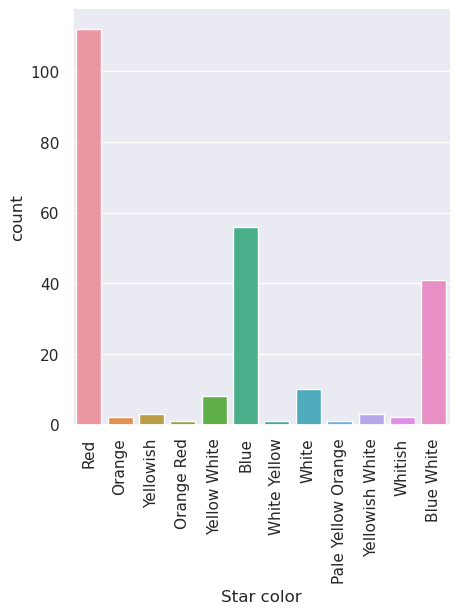

In [169]:
sns.catplot(data=stars_df, x='Star color', kind='count')
plt.xticks(rotation= 90)
plt.show()

[]

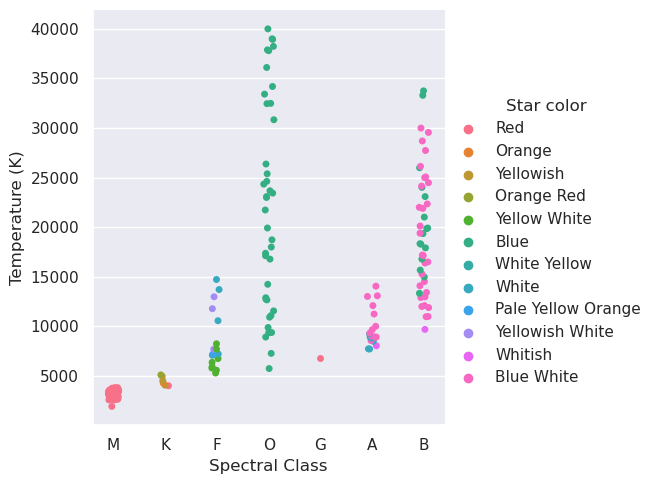

In [174]:
sns.catplot(data=stars_df, x='Spectral Class', y='Temperature (K)', hue='Star color', kind='strip')
plt.plot()